<h2 align="center"> P2 - Investigate a Dataset</h2>

As part of P2-Investigate a Dataset, I chose to investigate **Titanic dataset**. 


<h4 align="center">Brief History</h4>

Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The British registered ocean liner was built in 1912 for the transatlantic passenger and mail service between Southampton and New York. Constructed at the Harland and Wolff shipyard in Belfast, Ireland the Titanic was, on her maiden voyage, the largest vessel afloat. Thomas Andrews, her architect, died in the disaster.<br/><br/>
Although Titanic had advanced safety features such as watertight compartments and remotely activated watertight doors, there were not enough lifeboats to accommodate all of those aboard due to outdated maritime safety regulations. Titanic only carried enough lifeboats for 1,178 people—slightly more than half of the number on board, and one third of her total capacity.
After leaving Southampton on 10 April 1912, e new liner sailed from Southampton, England and on  14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 p.m. ship's time. The collision caused the ship's hull plates to buckle inwards along her starboard side and opened five of her sixteen watertight compartments to the sea; the ship gradually filled with water. Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats.[3] At 2:20 a.m., she broke apart and foundered—with well over one thousand people still aboard. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived at the scene, where she brought aboard an estimated 705 survivors.<br/><br/>
It has rightly been called as the greatest shipwreck drama of the 20th century, a catastrophic event which has been greeted with worldwide shock and outrage at the huge loss of life and the regulatory and operational failures that had led to it.

![Titanic]("https://upload.wikimedia.org/wikipedia/en/9/92/3D_model_of_Titanic_II.png")

<br/>

The dataset contains demographics and passenger information from **891** of the **2224 passengers and crew on board the Titanic**. 

### VARIABLE DESCRIPTIONS:

<table width="50%" align="left" border="none">
<tr><td>survival</td><td>Survival<br/>(0 = No; 1 = Yes)</td></tr>
<tr><td>pclass</td><td>Passenger Class<br/>(1 = 1st; 2 = 2nd; 3 = 3rd)</td></tr>
<tr><td>name</td><td>Name</td></tr>
<tr><td>sex</td><td>Sex</td></tr>
<tr><td>age</td><td>Age</td></tr>
<tr><td>sibsp</td><td>Number of Siblings/Spouses Aboard</td></tr>
<tr><td>parch</td><td>Number of Parents/Children Aboard</td></tr>
<tr><td>ticket</td><td>Ticket Number</td></tr>
<tr><td>cabin</td><td>Cabin</td></tr>
<tr><td>embarked</td><td>Port of Embarkation<br/>(C = Cherbourg; Q = Queenstown; S = Southampton)</td></tr>
</table>


**SPECIAL NOTES:**

* Pclass is a proxy for socio-economic status (SES)<br/>
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower<br/><br/>

* Age is in Years; Fractional if Age less than One (1) <br/>
    If the Age is Estimated, it is in the form xx.5<br/><br/>

* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the 
  definitions used for sibsp and parch.<br/>

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic<br/>
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)<br/>
    Parent:   Mother or Father of Passenger Aboard Titanic<br/>
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic<br/>

    Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children   
    travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a 
    village, however, the definitions do not support such relations.

**Questions I hope to investigate in this report**

Q1. How many passengers survived and how many did not?

Q2. Out of the surviving passengers, what were the survival rates for male and females?

Q3. Did the class in which the passengers travelling, had an impact on the survival rate?

Q4. What was the average age for people who survived?

Q5. How many families were impacted by the disaster?

Q6. Did the port from where the passengers embarked(on board) the ship had an impact on their survival?

<h3 align="center">Analysis</h3>

In [377]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


We read the titanic-data.csv into panda data frame(**titanic_df**) and print the top 5 head records to have a overview of the data.

In [373]:
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


When I dived deeper into this data to understand the data formats and for the purposes of cleaning this data,
I found that out of **891 passenger records** available:
* Age of 177 passengers is missing
* Cabin details of only 204 passengers are available and of 607 are missing
* Port of embarkation of 2 passengers is missing

In [353]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


I would not be using cabin details of the passengers for my analyis,so I chose to drop this column from my data frame. As for the missing ports, I chose to ignore these passengers as they are just a 0.22446689113356% of the data set. 
Since I would be investigating the passengers based on their ages as well, I chose to fill 0 for the missing values so that any wrong ages do not impact my analysis.

In [364]:
# drop column for 'Çabin' from the data set
titanic_data_frame= titanic_df.drop('Cabin',1)
#Replace NA values for age with 0
titanic_data_frame['Age'].fillna(value=0,inplace=True)
titanic_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Below are the some of the general statistics about the data set

In [363]:
titanic_data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [368]:
## split data frames into groups of passengers who survived
surviving_passengers_df =titanic_data_frame[titanic_data_frame['Survived']==1]
## split data frames into groups of passengers who did not survive
non_surviving_passengers_df =titanic_data_frame[titanic_data_frame['Survived']==0]
surviving_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [369]:
#statistics of patients who survived
surviving_passengers_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,24.034123,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,17.126720,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,7.250000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,25.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


**Passenger survival rate**

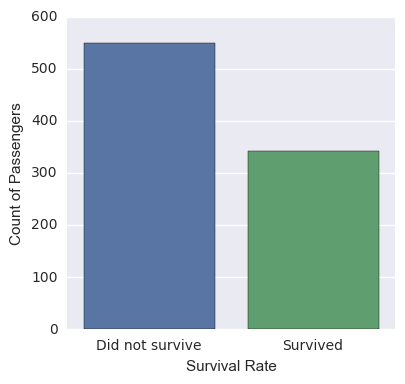

In [405]:
## Factor plot to show count of passengers who survived
survival_fg = sns.factorplot(x="Survived",data=titanic_data_frame,kind="count")
## Modify facet grid for x/y axis text
(survival_fg.set_axis_labels("Survival Rate", "Count of Passengers")
.set_xticklabels(["Did not survive", "Survived"])
.despine(left=True))

In [413]:
##Calculate count of passengers who survived and who did not
surviving_passengers_count = surviving_passengers_df['PassengerId'].count()
print "Survival count"
print ""
print "Survived: %d" %surviving_passengers_count
non_surviving_passengers_count = non_surviving_passengers_df['PassengerId'].count()
print "Did not survive: %d" %non_surviving_passengers_count

Survival count

Survived: 342
Did not survive: 549


**Based on Gender**

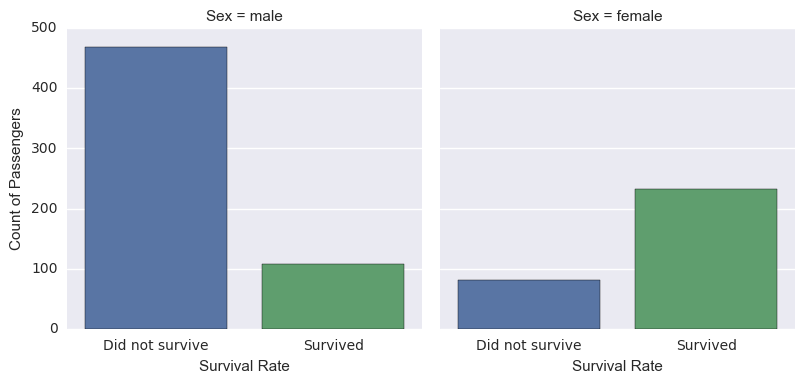

In [423]:
##Comparison count of males/females who survived and how many did not
gender_fg = sns.factorplot(x="Survived",col="Sex",data=titanic_data_frame,kind="count")
## Modify facet grid for x/y axis text
(gender_fg.set_axis_labels("Survival Rate", "Count of Passengers")
.set_xticklabels(["Did not survive", "Survived"])
.despine(left=True))

In [435]:
##Calculate count of passengers who survived and who did not based on gender
##Find surviving passengers df based on gender
male_surviving_passengers_df = surviving_passengers_df[surviving_passengers_df['Sex']=='male']
female_surviving_passengers_df = surviving_passengers_df[surviving_passengers_df['Sex']=='female']
print "Survival count based on gender::"
print ""
print "Survived:"
print "Male: %d" %male_surviving_passengers_df['PassengerId'].count()
print "Female: %d" %female_surviving_passengers_df['PassengerId'].count()

##Find non-surviving passengers df based on gender
male_non_surviving_passengers_df = non_surviving_passengers_df[non_surviving_passengers_df['Sex']=='male']
female_non_surviving_passengers_df = non_surviving_passengers_df[non_surviving_passengers_df['Sex']=='female']

print ""
print "Did not Survive:"
print "Male: %d" %male_non_surviving_passengers_df['PassengerId'].count()
print "Female: %d" %female_non_surviving_passengers_df['PassengerId'].count()

Survival count based on gender::

Survived:
Male: 109
Female: 233

Did not Survive:
Male: 468
Female: 81


In [370]:
non_surviving_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [371]:
#statistics of patients who did not survive
non_surviving_passengers_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,23.653005,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,17.896150,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,4.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,24.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [158]:
# Mean Passenger class of passengers who survived
surviving_passengers_df['Pclass'].mean()

1.9502923976608186

In [159]:
# Mean age of passengers who survived
surviving_passengers_df['Age'].mean()

24.034122807017543

In [160]:
#compute age based statistics of passengers in each class who survived
surviving_passengers_df.groupby('Pclass')['Age'].describe()

Pclass       
1       count    136.000000
        mean      31.727353
        std       16.913693
        min        0.000000
        25%       22.000000
        50%       33.500000
        75%       43.250000
        max       80.000000
2       count     87.000000
        mean      24.710690
        std       15.481908
        min        0.000000
        25%       13.500000
        50%       27.000000
        75%       34.000000
        max       62.000000
3       count    119.000000
        mean      14.747227
        std       13.789611
        min        0.000000
        25%        0.000000
        50%       16.000000
        75%       26.000000
        max       63.000000
Name: Age, dtype: float64

In [161]:
# Statistics about passengers who survived based on sex
surviving_passengers_df.groupby('Sex')['PassengerId'].describe()

Sex          
female  count    233.000000
        mean     429.699571
        std      255.048296
        min        2.000000
        25%      238.000000
        50%      400.000000
        75%      636.000000
        max      888.000000
male    count    109.000000
        mean     475.724771
        std      244.717482
        min       18.000000
        25%      272.000000
        50%      508.000000
        75%      680.000000
        max      890.000000
Name: PassengerId, dtype: float64

In [173]:
## Statistics based on port of embarkation
print 'Count per embarked port'
print surviving_passengers_df.groupby('Embarked')['PassengerId'].count()
print 'Mean per embarked port'
print surviving_passengers_df.groupby('Embarked')['PassengerId'].mean()
print 'Standard Deviation per embarked port'
print surviving_passengers_df.groupby('Embarked')['PassengerId'].std()


Count per embarked port
Embarked
       2
C     93
Q     30
S    217
Name: PassengerId, dtype: int64
Mean per embarked port
Embarked
     446.000000
C    473.989247
Q    319.966667
S    448.857143
Name: PassengerId, dtype: float64
Standard Deviation per embarked port
Embarked
     543.058008
C    253.344348
Q    224.947424
S    249.991764
Name: PassengerId, dtype: float64


In [182]:
#Count the no of surviving passengers having sibling/spouse on aboard
surviving_passengers_df.groupby('SibSp')['PassengerId'].count()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: PassengerId, dtype: int64

In [183]:
#Count the no of surviving passengers having parents on aboard
surviving_passengers_df.groupby('Parch')['PassengerId'].count()

Parch
0    233
1     65
2     40
3      3
5      1
Name: PassengerId, dtype: int64

In [205]:
#Determine parents/spouse/sibling count for passengers on board
titanic_data_frame.groupby(['Survived','Parch','SibSp'])['Parch'].count()

Survived  Parch  SibSp
0         0      0        374
                 1         59
                 2         12
          1      0         13
                 1         23
                 2          1
                 3          7
                 4          9
          2      0          8
                 1          7
                 2          2
                 3          5
                 4          6
                 5          5
                 8          7
          3      1          2
          4      0          1
                 1          3
          5      0          2
                 1          2
          6      1          1
1         0      0        163
                 1         64
                 2          4
                 3          2
          1      0         25
                 1         34
                 2          6
          2      0         21
                 1         12
                 2          2
                 3          2
                 

In [316]:
#Determine families who lost family members in the disaster
family_members_count=0
for name,data_point in titanic_data_frame.groupby('Ticket'):
    family_members_count=data_point.size/12
    alive_family_members_count=0
    passenger_group =data_point.reset_index().iloc[0]
    family_member_count=max(passenger_group.SibSp+passenger_group.Parch+1,family_members_count)
    if  family_members_count > 1:
        for family_member in range(len(data_point)): 
            if data_point.iloc[family_member]['Survived']==1:
                alive_family_members_count+=1
        if alive_family_members_count<family_members_count:
            print data_point

     PassengerId  Survived  Pclass                                    Name  \
262          263         0       1                       Taussig, Mr. Emil   
558          559         1       1  Taussig, Mrs. Emil (Tillie Mandelbaum)   
585          586         1       1                     Taussig, Miss. Ruth   

        Sex   Age  SibSp  Parch  Ticket   Fare Cabin Embarked  
262    male  52.0      1      1  110413  79.65   E67        S  
558  female  39.0      1      1  110413  79.65   E67        S  
585  female  18.0      0      2  110413  79.65   E68        S  
     PassengerId  Survived  Pclass                            Name   Sex  \
110          111         0       1  Porter, Mr. Walter Chamberlain  male   
475          476         0       1     Clifford, Mr. George Quincy  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
110  47.0      0      0  110465  52.0  C110        S  
475   NaN      0      0  110465  52.0   A14        S  
     PassengerId  Survived  Pclass   

In [322]:

g = titanic_data_frame.groupby('Ticket')
g.apply(lambda x: x[x['Survived'] == 1]['PassengerId'].count())

Ticket
110152               3
110413               2
110465               0
110564               1
110813               1
111240               0
111320               0
111361               2
111369               1
111426               1
111427               1
111428               1
112050               0
112052               0
112053               1
112058               0
112059               0
112277               1
112379               0
113028               0
113043               0
113050               0
113051               0
113055               1
113056               0
113059               0
113501               0
113503               0
113505               2
113509               0
                    ..
SOTON/OQ 392082      0
SOTON/OQ 392086      0
SOTON/OQ 392089      1
SOTON/OQ 392090      0
STON/O 2. 3101269    1
STON/O 2. 3101273    0
STON/O 2. 3101274    0
STON/O 2. 3101275    0
STON/O 2. 3101280    0
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON

In [ ]:
aggregations ={
    'Survived':{
        'total_members' : 'count'
        'surviving_members' : 
    }
}